In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import os

import cv2

from glob import glob
from matplotlib.patches import  Polygon
from matplotlib.collections import PatchCollection
from scipy.stats import linregress
from scipy.spatial.distance import cdist


from utils import fileio
from utils import handtrace
from utils import matrices
from utils import geometry
from utils import mechanics
from utils import visualise

In [25]:
indir='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Compare_cellpose/'
NC_hand=pd.read_csv(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_NC_hand\\*\\Data/20231128_1_5min000_cell_data_geometry.csv')[-1])
IP_hand=pd.read_csv(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_IP_hand\\*\\Data/20231128_1_5min000_cell_data_geometry.csv')[-1])

cp_MM=pd.read_csv(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_cp_membrane_uncorrected\\*\\Data/20231128_1_5min000_cell_data_geometry.csv')[-1])
cp_UM2=pd.read_csv(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_cp_UM2_uncorrected\\*\\Data/20231128_1_5min000_cell_data_geometry.csv')[-1])

In [26]:

pixel_size=1024
micron_size=554.11

R_NC_hand=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_NC_hand\\*\\Matrices/*Matrix_R.txt')[-1])*(micron_size/pixel_size)
R_IP_hand=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_IP_hand\*\\Matrices/*Matrix_R.txt')[-1])*(micron_size/pixel_size)
R_cp_mem=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_cp_membrane_uncorrected\*\\Matrices/*Matrix_R.txt')[-1])*(micron_size/pixel_size)
R_cp_uni=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_cp_UM2_uncorrected\*\\Matrices/*Matrix_R.txt')[-1])*(micron_size/pixel_size)

A_NC_hand=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_NC_hand\\*\\Matrices/*Matrix_A.txt')[-1])
A_IP_hand=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_IP_hand\*\\Matrices/*Matrix_A.txt')[-1])
A_cp_mem=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_cp_membrane_uncorrected\*\\Matrices/*Matrix_A.txt')[-1])
A_cp_uni=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_cp_UM2_uncorrected\*\\Matrices/*Matrix_A.txt')[-1])

B_NC_hand=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_NC_hand\\*\\Matrices/*Matrix_B.txt')[-1])
B_IP_hand=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_IP_hand\*\\Matrices/*Matrix_B.txt')[-1])
B_cp_mem=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_cp_membrane_uncorrected\*\\Matrices/*Matrix_B.txt')[-1])
B_cp_uni=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_cp_UM2_uncorrected\*\\Matrices/*Matrix_B.txt')[-1])

C_NC_hand=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_NC_hand\\*\\Matrices/*Matrix_C.txt')[-1])
C_IP_hand=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_IP_hand\*\\Matrices/*Matrix_C.txt')[-1])
C_cp_mem=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_cp_membrane_uncorrected\*\\Matrices/*Matrix_C.txt')[-1])
C_cp_uni=np.loadtxt(glob(indir+'20231128_1_IP_GFPCAAX-CheHis_uf_8p6_SP_5min000_testtrace_cp_UM2_uncorrected\*\\Matrices/*Matrix_C.txt')[-1])

R_NC_hand=R_NC_hand-np.mean(R_NC_hand, axis=0)
R_IP_hand=R_IP_hand-np.mean(R_IP_hand, axis=0)
R_cp_mem=R_cp_mem-np.mean(R_cp_mem, axis=0)
R_cp_uni=R_cp_uni-np.mean(R_cp_uni, axis=0)


In [27]:
cc_NC_hand=geometry.get_cell_centres(C_NC_hand,R_NC_hand,np.array(NC_hand.cell_edge_count))
cc_IP_hand=geometry.get_cell_centres(C_IP_hand,R_IP_hand,np.array(IP_hand.cell_edge_count))
cc_cp_mem=geometry.get_cell_centres(C_cp_mem,R_cp_mem,np.array(cp_MM.cell_edge_count))
cc_cp_uni=geometry.get_cell_centres(C_cp_uni,R_cp_uni,np.array(cp_UM2.cell_edge_count))

In [30]:
ST_NC_hand=np.zeros((len(NC_hand), 2, 2))
sigma_NC_hand=np.zeros((len(NC_hand), 2))
for i in range(len(NC_hand)):
    Ralpha=R_NC_hand[np.where(C_NC_hand[i]!=0)]-cc_NC_hand[i]
    ST_NC_hand[i]=(1/NC_hand.cell_edge_count.iloc[i])* Ralpha.T@Ralpha
    sigma_NC_hand[i]=np.linalg.svd(Ralpha, full_matrices=False)[1]

evS_NC_hand=np.linalg.eigvals(ST_NC_hand)


NC_hand['circ_ev']=abs(np.min(evS_NC_hand, axis=1)/np.max(evS_NC_hand, axis=1))
NC_hand['circ_svd']=sigma_NC_hand[:,1]/sigma_NC_hand[:,0]
NC_hand['circ_IQ']=4*np.pi*NC_hand.cell_area_microns/(NC_hand.cell_perimeter_microns**2)


ST_IP_hand=np.zeros((len(IP_hand), 2, 2))
sigma_IP_hand=np.zeros((len(IP_hand), 2))

for i in range(len(IP_hand)):
    Ralpha=R_IP_hand[np.where(C_IP_hand[i]!=0)]-cc_IP_hand[i]
    ST_IP_hand[i]=(1/IP_hand.cell_edge_count.iloc[i])* Ralpha.T@Ralpha
    sigma_IP_hand[i]=np.linalg.svd(Ralpha, full_matrices=False)[1]

evS_IP_hand=np.linalg.eigvals(ST_IP_hand)


IP_hand['circ_ev']=abs(np.min(evS_IP_hand, axis=1)/np.max(evS_IP_hand, axis=1))
IP_hand['circ_svd']=sigma_IP_hand[:,1]/sigma_IP_hand[:,0]
IP_hand['circ_IQ']=4*np.pi*IP_hand.cell_area_microns/(IP_hand.cell_perimeter_microns**2)


ST_cp_MM=np.zeros((len(cp_MM), 2, 2))
sigma_cp_MM=np.zeros((len(cp_MM), 2))

for i in range(len(cp_MM)):
    Ralpha=R_cp_mem[np.where(C_cp_mem[i]!=0)] - cc_cp_mem[i]
    ST_cp_MM[i]=(1/cp_MM.cell_edge_count.iloc[i])* Ralpha.T@Ralpha
    sigma_cp_MM[i]=np.linalg.svd(Ralpha, full_matrices=False)[1]
    

evS_cp_MM=np.linalg.eigvals(ST_cp_MM)


cp_MM['circ_ev']=abs(np.min(evS_cp_MM, axis=1)/np.max(evS_cp_MM, axis=1))
cp_MM['circ_svd']=sigma_cp_MM[:,1]/sigma_cp_MM[:,0]
cp_MM['circ_IQ']=4*np.pi*cp_MM.cell_area_microns/(cp_MM.cell_perimeter_microns**2)

ST_cp_UM2=np.zeros((len(cp_UM2), 2, 2))
sigma_cp_UM2=np.zeros((len(cp_UM2), 2))
for i in range(len(cp_UM2)):
    Ralpha=R_cp_uni[np.where(C_cp_uni[i]!=0)] - cc_cp_uni[i]
    ST_cp_UM2[i]=(1/cp_UM2.cell_edge_count.iloc[i])* Ralpha.T@Ralpha
    sigma_cp_UM2[i]=np.linalg.svd(Ralpha, full_matrices=False)[1]

evS_cp_UM2=np.linalg.eigvals(ST_cp_UM2)

cp_UM2['circ_ev']=abs(np.min(evS_cp_UM2, axis=1)/np.max(evS_cp_UM2, axis=1))
cp_UM2['circ_svd']=sigma_cp_UM2[:,1]/sigma_cp_UM2[:,0]
cp_UM2['circ_IQ']=4*np.pi*cp_UM2.cell_area_microns/(cp_UM2.cell_perimeter_microns**2)

In [31]:
NC_hand['trace_type']='NC_hand'
IP_hand['trace_type']='IP_hand'
cp_MM['trace_type']='cp_membrane'
cp_UM2['trace_type']='cp_universal'

trace_dat=pd.concat([NC_hand,IP_hand, cp_MM, cp_UM2])

In [32]:
trace_dat['angle_horizontal']=abs(np.where(trace_dat.major_shape_axis_alignment_rads<np.pi/2,trace_dat.major_shape_axis_alignment_rads, trace_dat.major_shape_axis_alignment_rads-np.pi))


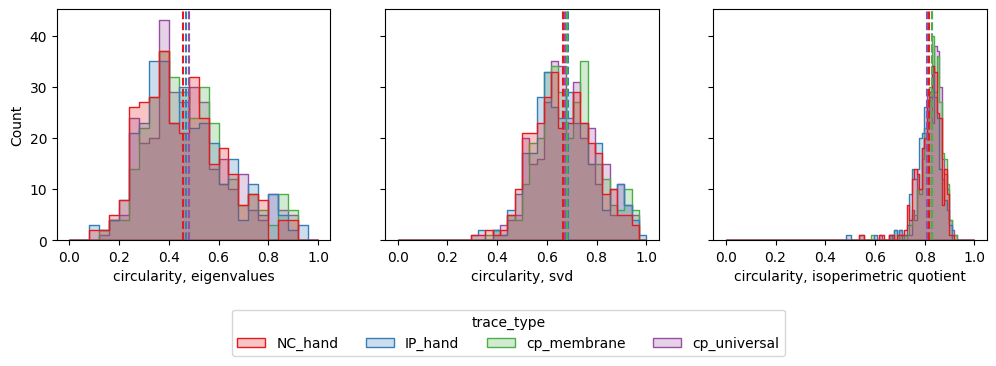

In [74]:
fig, ax=plt.subplots(1,3,figsize=(12, 3), sharey=True)

g=sns.histplot(data=trace_dat, hue='trace_type',x='circ_ev', element="step", palette=sns.color_palette("Set1", 4), ax=ax[0], legend=False,binrange=[0,1])
ax[0].axvline(np.mean(trace_dat[trace_dat.trace_type =='NC_hand'].circ_ev), c=sns.color_palette("Set1", 4)[0], linestyle='--')
ax[0].axvline(np.mean(trace_dat[trace_dat.trace_type =='cp_membrane'].circ_ev), c=sns.color_palette("Set1", 4)[2], linestyle='--')
ax[0].axvline(np.mean(trace_dat[trace_dat.trace_type =='cp_universal'].circ_ev), c=sns.color_palette("Set1", 4)[3], linestyle='--')
ax[0].axvline(np.mean(trace_dat[trace_dat.trace_type =='IP_hand'].circ_ev), c=sns.color_palette("Set1", 4)[1], linestyle='--')

g=sns.histplot(data=trace_dat, hue='trace_type',x='circ_svd', element="step", palette=sns.color_palette("Set1", 4), ax=ax[1], legend=False , binrange=[0,1])
ax[1].axvline(np.mean(trace_dat[trace_dat.trace_type =='NC_hand'].circ_svd), c=sns.color_palette("Set1", 4)[0], linestyle='--')
ax[1].axvline(np.mean(trace_dat[trace_dat.trace_type =='cp_membrane'].circ_svd), c=sns.color_palette("Set1", 4)[1], linestyle='--')
ax[1].axvline(np.mean(trace_dat[trace_dat.trace_type =='cp_universal'].circ_svd), c=sns.color_palette("Set1", 4)[2], linestyle='--')
ax[1].axvline(np.mean(trace_dat[trace_dat.trace_type =='IP_hand'].circ_svd), c=sns.color_palette("Set1", 4)[3], linestyle='--')

g=sns.histplot(data=trace_dat, hue='trace_type',x='circ_IQ', element="step", palette=sns.color_palette("Set1", 4), ax=ax[2], legend=True, binrange=[0,1])
ax[2].axvline(np.mean(trace_dat[trace_dat.trace_type =='NC_hand'].circ_IQ), c=sns.color_palette("Set1", 4)[0], linestyle='--')
ax[2].axvline(np.mean(trace_dat[trace_dat.trace_type =='cp_membrane'].circ_IQ), c=sns.color_palette("Set1", 4)[1], linestyle='--')
ax[2].axvline(np.mean(trace_dat[trace_dat.trace_type =='cp_universal'].circ_IQ), c=sns.color_palette("Set1", 4)[2], linestyle='--')
ax[2].axvline(np.mean(trace_dat[trace_dat.trace_type =='IP_hand'].circ_IQ), c=sns.color_palette("Set1", 4)[3], linestyle='--')


plt.subplots_adjust(hspace=0.2)
ax[1].set_ylabel('')
ax[2].set_ylabel('')


ax[0].set_xlabel('circularity, eigenvalues')
ax[1].set_xlabel('circularity, svd')
ax[2].set_xlabel('circularity, isoperimetric quotient')
sns.move_legend(g, "center", bbox_to_anchor=(-0.75, -0.4), frameon=True, ncol=4)
plt.savefig(indir+'/cell_circularities.png', dpi=300, bbox_inches='tight')

In [72]:
sns.color_palette("Set1", 4)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098)]

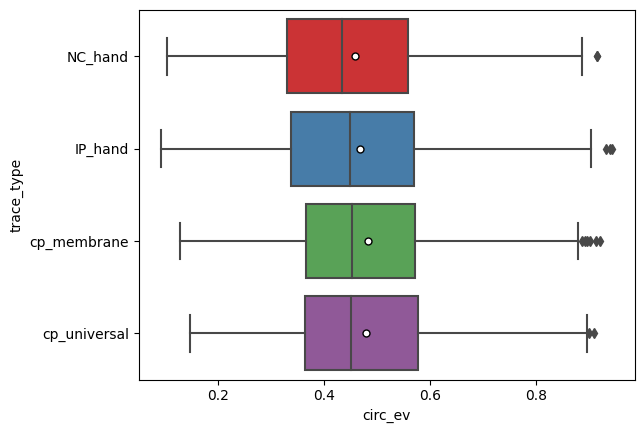

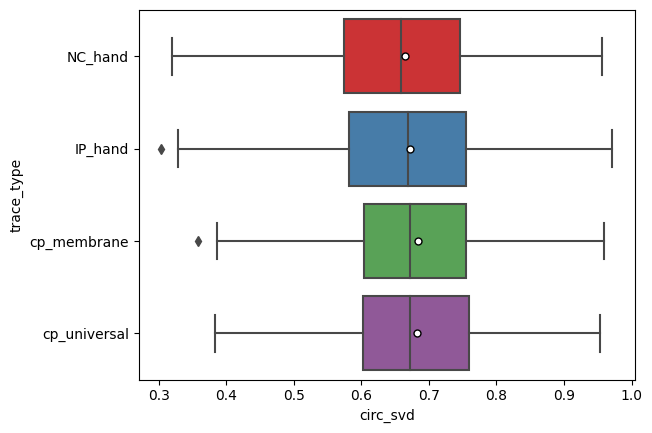

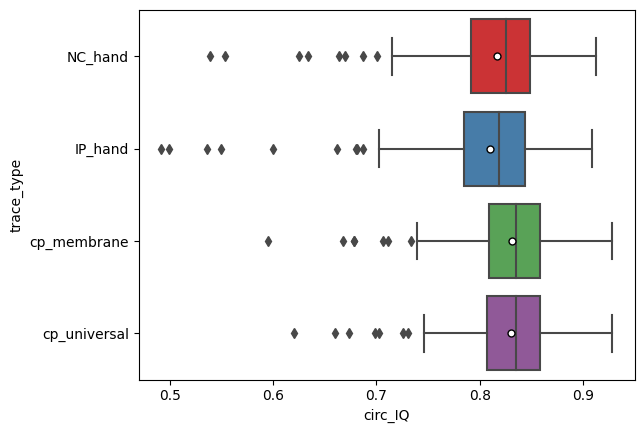

In [76]:
sns.boxplot(data=trace_dat, x='circ_ev', y='trace_type', showmeans=True,            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},palette=sns.color_palette("Set1", 4))

plt.savefig(indir+'/circ_ev_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()

sns.boxplot(data=trace_dat, x='circ_svd', y='trace_type', showmeans=True,            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},palette=sns.color_palette("Set1", 4))

plt.savefig(indir+'/circ_svd_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

sns.boxplot(data=trace_dat, x='circ_IQ', y='trace_type', showmeans=True,            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},palette=sns.color_palette("Set1", 4))

plt.savefig(indir+'/circ_IQ_boxplot.png', dpi=300, bbox_inches='tight')

In [79]:
trace_dat.groupby('trace_type').circ_ev.describe()
#trace_dat.groupby('trace_type').circ_svd.describe()
#trace_dat.groupby('trace_type').circ_IQ.describe()

,count,mean,std,min,25%,50%,75%,max
trace_type,,,,,,,,
IP_hand,314.0,0.468304,0.173911,0.092467,0.337826,0.448155,0.570171,0.943600
NC_hand,313.0,0.457441,0.163697,0.102350,0.329875,0.433840,0.557756,0.915326
cp_membrane,312.0,0.482313,0.165508,0.128297,0.365069,0.452517,0.571049,0.919772
cp_universal,312.0,0.479359,0.165396,0.147031,0.363763,0.451421,0.576840,0.908796


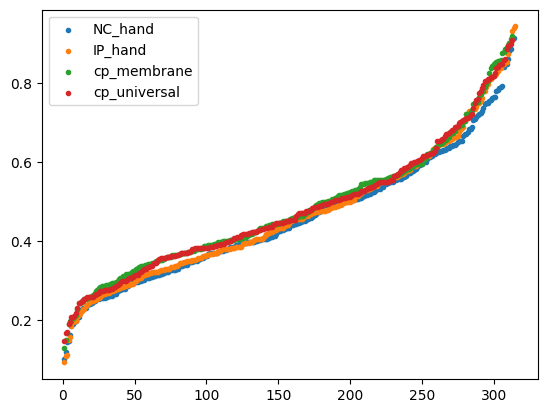

In [38]:
plt.scatter(np.linspace(1, len(NC_hand)+1, len(NC_hand)),sorted(NC_hand.circularity), marker='.', label='NC_hand')
plt.scatter(np.linspace(1, len(IP_hand)+1, len(IP_hand)),sorted(IP_hand.circularity), marker='.', label='IP_hand')
plt.scatter(np.linspace(1, len(cp_MM)+1, len(cp_MM)),sorted(cp_MM.circularity), marker='.', label='cp_membrane')
plt.scatter(np.linspace(1, len(cp_UM2)+1, len(cp_UM2)),sorted(cp_UM2.circularity), marker='.', label='cp_universal')
plt.legend()

plt.savefig(indir+'/sorted_circ_ev.png', dpi=300, bbox_inches='tight')

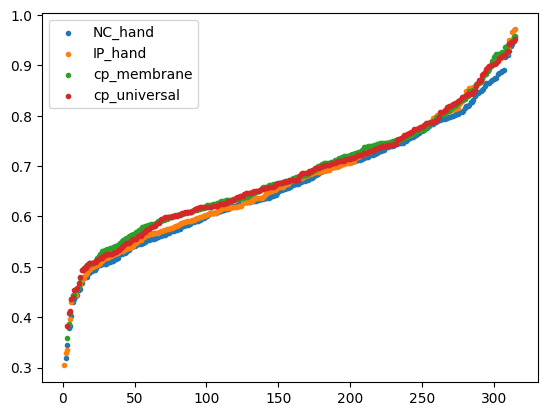

In [44]:
plt.scatter(np.linspace(2, len(NC_hand)+2, len(NC_hand)),sorted(NC_hand.circ_svd), marker='.', label='NC_hand')
plt.scatter(np.linspace(1, len(IP_hand)+1, len(IP_hand)),sorted(IP_hand.circ_svd), marker='.', label='IP_hand')
plt.scatter(np.linspace(3, len(cp_MM)+3, len(cp_MM)),sorted(cp_MM.circ_svd), marker='.', label='cp_membrane')
plt.scatter(np.linspace(3, len(cp_UM2)+3, len(cp_UM2)),sorted(cp_UM2.circ_svd), marker='.', label='cp_universal')
plt.legend()

#plt.savefig(indir+'/sorted_circ_svd.png', dpi=300, bbox_inches='tight')

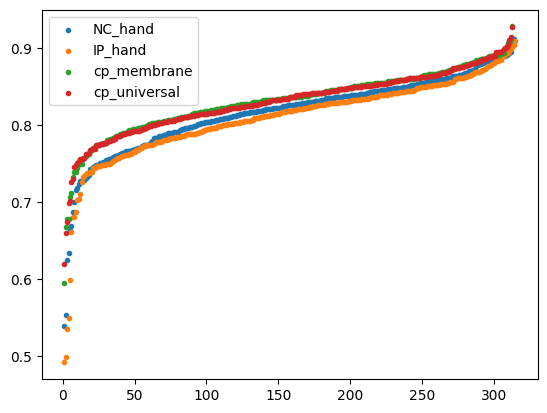

In [39]:
plt.scatter(np.linspace(1, len(NC_hand)+1, len(NC_hand)),sorted(NC_hand.circ_IQ), marker='.', label='NC_hand')
plt.scatter(np.linspace(1, len(IP_hand)+1, len(IP_hand)),sorted(IP_hand.circ_IQ), marker='.', label='IP_hand')
plt.scatter(np.linspace(1, len(cp_MM)+1, len(cp_MM)),sorted(cp_MM.circ_IQ), marker='.', label='cp_membrane')
plt.scatter(np.linspace(1, len(cp_UM2)+1, len(cp_UM2)),sorted(cp_UM2.circ_IQ), marker='.', label='cp_universal')
plt.legend()

plt.savefig(indir+'/sorted_circ_IQ.png', dpi=300, bbox_inches='tight')

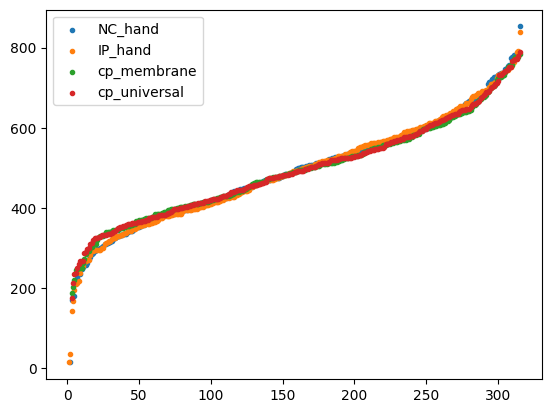

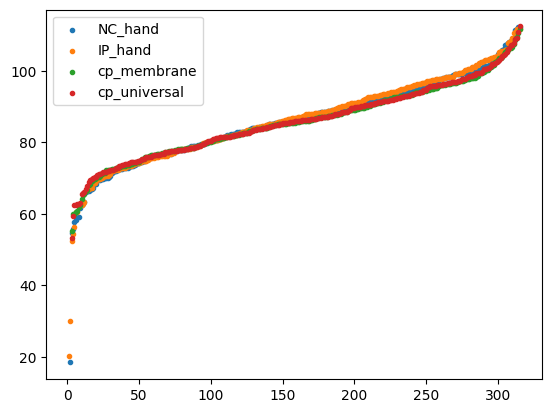

In [45]:

plt.scatter(np.linspace(2, len(NC_hand)+2, len(NC_hand)),sorted(NC_hand.cell_area_microns), marker='.', label='NC_hand')
plt.scatter(np.linspace(1, len(IP_hand)+1, len(IP_hand)),sorted(IP_hand.cell_area_microns), marker='.', label='IP_hand')
plt.scatter(np.linspace(3, len(cp_MM)+3, len(cp_MM)),sorted(cp_MM.cell_area_microns), marker='.', label='cp_membrane')
plt.scatter(np.linspace(3, len(cp_UM2)+3, len(cp_UM2)),sorted(cp_UM2.cell_area_microns), marker='.', label='cp_universal')
plt.legend()
plt.show()

plt.scatter(np.linspace(2, len(NC_hand)+2, len(NC_hand)),sorted(NC_hand.cell_perimeter_microns), marker='.', label='NC_hand')
plt.scatter(np.linspace(1, len(IP_hand)+1, len(IP_hand)),sorted(IP_hand.cell_perimeter_microns), marker='.', label='IP_hand')
plt.scatter(np.linspace(3, len(cp_MM)+3, len(cp_MM)),sorted(cp_MM.cell_perimeter_microns), marker='.', label='cp_membrane')
plt.scatter(np.linspace(3, len(cp_UM2)+3, len(cp_UM2)),sorted(cp_UM2.cell_perimeter_microns), marker='.', label='cp_universal')
plt.legend()
plt.show()

In [79]:
1/NC_hand.cell_edge_count.iloc[0]

0.3333333333333333

In [105]:
Ralpha.T

array([[351423.83249544, 346710.69590711, 357528.4219334 ,
        348122.06011907, 361275.27182059, 353809.68220479,
        354713.89230573, 359349.72595796],
       [346710.69590711, 342293.30161216, 352650.13816342,
        343770.54900829, 356449.9874121 , 349451.72918267,
        350341.88420432, 354800.27248053],
       [357528.4219334 , 352650.13816342, 363768.87713783,
        354055.64609235, 367543.83718359, 359817.05734433,
        360737.66503778, 365495.30937719],
       [348122.06011907, 343770.54900829, 354055.64609235,
        345284.3981734 , 357908.20188836, 351013.89268283,
        351906.97584601, 356341.93899007],
       [361275.27182059, 356449.9874121 , 367543.83718359,
        357908.20188836, 371404.59177586, 363761.26396988,
        364690.65608788, 369446.54354238],
       [353809.68220479, 349451.72918267, 359817.05734433,
        351013.89268283, 363761.26396988, 356856.41345488,
        357763.55169734, 362238.92319436],
       [354713.89230573, 350341.88